NOTES:

- Using ! at beggining of line or %%bash at beggining of cell allows for direct implementation of shell commands

# Introduction

## BIDS & Tutorial Dataset

In [3]:
!pwd

/home/leila/test-project


In [4]:
!mkdir data
%cd data

mkdir: cannot create directory ‘data’: File exists
/home/leila/test-project/data


In [7]:
%%bash 
pwd

/home/leila/test-project/data


In [4]:
# Install dataset with subdirectories via datalad

%%bash
datalad install -r ///workshops/nih-2017/ds000114

install(ok): /home/leila/test-project/data/ds000114 (dataset)
install(ok): /home/leila/test-project/data/ds000114/derivatives/fmriprep (dataset)
install(ok): /home/leila/test-project/data/ds000114/derivatives/freesurfer (dataset)
action summary:
  install (ok: 3)


[INFO] Cloning dataset to <Dataset path=/home/leila/test-project/data/ds000114> 
[INFO] Attempting to clone from http://datasets.datalad.org/workshops/nih-2017/ds000114 to /home/leila/test-project/data/ds000114 
[INFO] Attempting to clone from http://datasets.datalad.org/workshops/nih-2017/ds000114/.git to /home/leila/test-project/data/ds000114 
[INFO] Completed clone attempts for <Dataset path=/home/leila/test-project/data/ds000114> 
[INFO] access to 1 dataset sibling datalad not auto-enabled, enable with:
| 		datalad siblings -d "/home/leila/test-project/data/ds000114" enable -s datalad 
[INFO] Installing <Dataset path=/home/leila/test-project/data/ds000114> underneath /home/leila/test-project/data/ds000114 recursively 
[INFO] Cloning dataset to <Dataset path=/home/leila/test-project/data/ds000114/derivatives/fmriprep> 
[INFO] Attempting to clone from http://datasets.datalad.org/workshops/nih-2017/ds000114/derivatives/fmriprep/.git to /home/leila/test-project/data/ds000114/derivative

In [10]:
# Download specific data

%%bash
cd ds000114
datalad get ./derivatives/fmriprep/sub-*/anat/*preproc.nii.gz \
./sub-01/ses-test/anat \
./sub-*/ses-test/func/*fingerfootlips*

get(ok): derivatives/fmriprep/sub-09/anat/sub-09_t1w_space-mni152nlin2009casym_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-05/anat/sub-05_t1w_space-mni152nlin2009casym_preproc.nii.gz (file) [from web...]
get(ok): derivatives/fmriprep/sub-10/anat/sub-10_t1w_space-mni152nlin2009casym_preproc.nii.gz (file) [from web...]
get(ok): derivatives/fmriprep/sub-04/anat/sub-04_t1w_space-mni152nlin2009casym_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-06/anat/sub-06_t1w_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-01/anat/sub-01_t1w_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-02/anat/sub-02_t1w_space-mni152nlin2009casym_preproc.nii.gz (file) [from web...]
get(ok): derivatives/fmriprep/sub-05/anat/sub-05_t1w_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-02/anat/sub-02_t1w_preproc.nii.gz (file) [from origin...]
get(ok): derivatives/fmriprep/sub-06/anat/sub-06_t1

In [8]:
ls ds000114/sub-01/ses-test/*

ds000114/sub-01/ses-test/anat:
sub-01_ses-test_T1w.nii.gz@

ds000114/sub-01/ses-test/dwi:
sub-01_ses-test_dwi.nii.gz@

ds000114/sub-01/ses-test/func:
sub-01_ses-test_task-covertverbgeneration_bold.nii.gz@
sub-01_ses-test_task-fingerfootlips_bold.nii.gz@
sub-01_ses-test_task-linebisection_bold.nii.gz@
sub-01_ses-test_task-linebisection_events.tsv@
sub-01_ses-test_task-overtverbgeneration_bold.nii.gz@
sub-01_ses-test_task-overtwordrepetition_bold.nii.gz@


In [18]:
cd ds000114


/home/leila/test-project/data/ds000114


In [21]:
%%bash
datalad get ./sub-01/ses-test/func/sub-01_ses-test_task-linebisection_events.tsv

In [22]:
!cat ./sub-01/ses-test/func/sub-01_ses-test_task-linebisection_events.tsv


onset	duration	weight	trial_type
24.3065	1	1.0	Incorrect_Task
25.9465	1	1.0	Correct_Task
27.5865	1	1.0	Correct_Task
29.2265	1	1.0	No_Response_Task
30.8664	1	1.0	Incorrect_Task
32.5064	1	1.0	No_Response_Task
34.1464	1	1.0	Correct_Task
35.7864	1	1.0	Incorrect_Task
37.4264	1	1.0	Correct_Task
39.0664	1	1.0	Incorrect_Task
56.973	1	1.0	Response_Control
58.613	1	1.0	No_Response_Control
60.253	1	1.0	Response_Control
61.893	1	1.0	No_Response_Control
63.533	1	1.0	Response_Control
65.173	1	1.0	Response_Control
66.8129	1	1.0	Response_Control
68.4529	1	1.0	Response_Control
70.0929	1	1.0	Response_Control
71.7329	1	1.0	No_Response_Control
89.6395	1	1.0	Correct_Task
91.2795	1	1.0	Correct_Task
92.9195	1	1.0	Incorrect_Task
94.5595	1	1.0	Incorrect_Task
96.1995	1	1.0	Correct_Task
97.8395	1	1.0	No_Response_Task
99.4795	1	1.0	Incorrect_Task
101.1194	1	1.0	Correct_Task
102.7594	1	1.0	Correct_Task
104.3994	1	1.0	Correct_Task
122.306	1	1.0	Response_Control
123.946	1	1.0	No_Response_Control
125.586	1	1.0	Respon

## Nipype Showcase

In [24]:
from nipype import Node, Workflow


In [25]:
from nipype.interfaces.fsl import SliceTimer, MCFLIRT, Smooth


In [26]:
# Initiate a node to correct for slice wise acquisition
slicetimer = Node(SliceTimer(index_dir=False,
                             interleaved=True,
                             time_repetition=2.5),
                  name="slicetimer")

In [27]:
# Initiate a node to correct for motion
mcflirt = Node(MCFLIRT(mean_vol=True,
                       save_plots=True),
               name="mcflirt")

In [28]:
# Initiate a node to smooth functional images
smooth = Node(Smooth(fwhm=4), name="smooth")

In [29]:
pwd

'/home/leila/test-project/data/ds000114'

In [38]:
!mkdir code

In [30]:
cd code/

/home/leila/test-project/data/ds000114/code


In [74]:
pwd

'/home/leila/test-project/data/ds000114/code'

In [75]:
# Create preprocessing workflow - test
preproc01 = Workflow(name='preproc01', base_dir='.')


In [76]:
# Populate workflow with nodes - test
preproc01.connect([(slicetimer, mcflirt, [('slice_time_corrected_file', 'in_file')]),
                   (mcflirt, smooth, [('out_file', 'in_file')])])

In [77]:
# Create workflow graph - test
preproc01.write_graph(graph2use='orig')


200324-20:10:31,144 nipype.workflow INFO:
	 Generated workflow graph: /home/leila/test-project/data/ds000114/code/preproc01/graph.png (graph2use=orig, simple_form=True).


'/home/leila/test-project/data/ds000114/code/preproc01/graph.png'

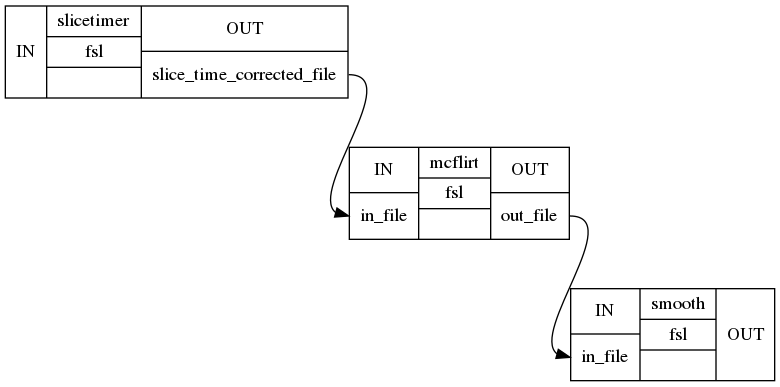

In [78]:
# Visualize graph - test
from IPython.display import Image
Image(filename="preproc01/graph_detailed.png")


In [31]:
# Create preprocessing workflow
preproc02 = Workflow(name='preproc02', base_dir='.')


In [32]:
# Populate workflow with nodes
preproc02.connect([(slicetimer, mcflirt, [('slice_time_corrected_file', 'in_file')]),
                   (mcflirt, smooth, [('out_file', 'in_file')])])

In [33]:
# Create workflow graph
preproc02.write_graph(graph2use='orig')


200324-19:40:23,750 nipype.workflow INFO:
	 Generated workflow graph: /home/leila/test-project/data/ds000114/code/preproc02/graph.png (graph2use=orig, simple_form=True).


'/home/leila/test-project/data/ds000114/code/preproc02/graph.png'

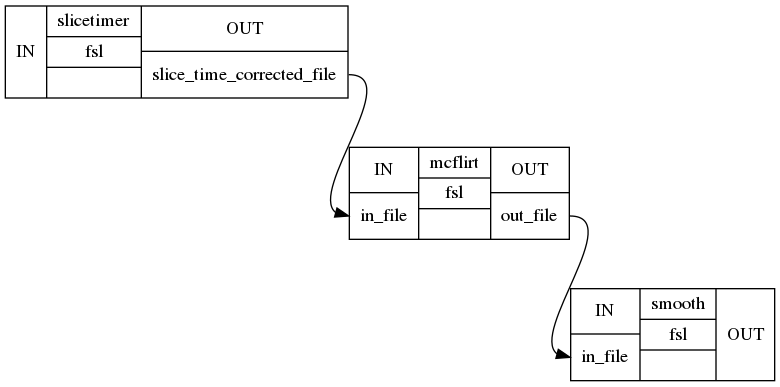

In [34]:
# Visualize graph
from IPython.display import Image
Image(filename="preproc02/graph_detailed.png")


### Run workflow on functional image

In [45]:
# Slice-timing

As slicetimer is 1st node of preprocessing workflow, this is where we specify the local data path.

In [79]:
pwd

'/home/leila/test-project/data/ds000114/code'

In [90]:
# Slicetimer - test
slicetimer.inputs.in_file = '../sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz'

# DOES NOT WORK - USE ABSOLUTE PATH (see below)

In [97]:
# Slicetimer

slicetimer.inputs.in_file = '/home/leila/test-project/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz'


In [37]:
%time preproc02.run()


200324-19:41:59,445 nipype.workflow INFO:
	 Workflow preproc02 settings: ['check', 'execution', 'logging', 'monitoring']
200324-19:41:59,450 nipype.workflow INFO:
	 Running serially.
200324-19:41:59,451 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.slicetimer" in "/home/leila/test-project/data/ds000114/code/preproc02/slicetimer".
200324-19:41:59,456 nipype.workflow INFO:
	 [Node] Running "slicetimer" ("nipype.interfaces.fsl.preprocess.SliceTimer"), a CommandLine Interface with command:
slicetimer --in=/home/leila/test-project/data/ds000114/sub-01/ses-test/func/sub-01_ses-test_task-fingerfootlips_bold.nii.gz --odd --out=/home/leila/test-project/data/ds000114/code/preproc02/slicetimer/sub-01_ses-test_task-fingerfootlips_bold_st.nii.gz --repeat=2.500000
200324-19:42:10,914 nipype.workflow INFO:
	 [Node] Finished "preproc02.slicetimer".
200324-19:42:10,916 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.mcflirt" in "/home/leila/test-project/data/ds000114/code/preproc02/mcflirt"

In [40]:
# Check results
!tree preproc02 -I '*js|*json|*pklz|_report|*.dot|*html'

preproc02
├── graph_detailed.png
├── graph.png
├── mcflirt
│   ├── command.txt
│   └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf.nii.gz
├── slicetimer
│   ├── command.txt
│   └── sub-01_ses-test_task-fingerfootlips_bold_st.nii.gz
└── smooth
    ├── command.txt
    └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf_smooth.nii.gz

3 directories, 8 files


In [41]:
# Modify smoothing node - FWHM

smooth.inputs.fwhm = 2

In [42]:
# Rerunning workflow

%time preproc02.run()

200324-19:47:00,32 nipype.workflow INFO:
	 Workflow preproc02 settings: ['check', 'execution', 'logging', 'monitoring']
200324-19:47:00,38 nipype.workflow INFO:
	 Running serially.
200324-19:47:00,39 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.slicetimer" in "/home/leila/test-project/data/ds000114/code/preproc02/slicetimer".
200324-19:47:00,41 nipype.workflow INFO:
	 [Node] Cached "preproc02.slicetimer" - collecting precomputed outputs
200324-19:47:00,41 nipype.workflow INFO:
	 [Node] "preproc02.slicetimer" found cached.
200324-19:47:00,42 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.mcflirt" in "/home/leila/test-project/data/ds000114/code/preproc02/mcflirt".
200324-19:47:00,45 nipype.workflow INFO:
	 [Node] Cached "preproc02.mcflirt" - collecting precomputed outputs
200324-19:47:00,46 nipype.workflow INFO:
	 [Node] "preproc02.mcflirt" found cached.
200324-19:47:00,47 nipype.workflow INFO:
	 [Node] Setting-up "preproc02.smooth" in "/home/leila/test-project/data/ds00011

### Running workflow in parallel

In [43]:
# Copy/clone 'prepoc02'

preproc03 = preproc02.clone('preproc03')
preproc04 = preproc02.clone('preproc04')
preproc05 = preproc02.clone('preproc05')


In [45]:
metaflow = Workflow(name='metaflow', base_dir = '.')

In [46]:
# Add parallel preproc workflow clones to metaflow
metaflow.add_nodes([preproc02,preproc03,preproc04,preproc05])

In [47]:
# Create graph
metaflow.write_graph(graph2use='flat')

200324-19:51:59,392 nipype.workflow INFO:
	 Generated workflow graph: /home/leila/test-project/data/ds000114/code/metaflow/graph.png (graph2use=flat, simple_form=True).


'/home/leila/test-project/data/ds000114/code/metaflow/graph.png'

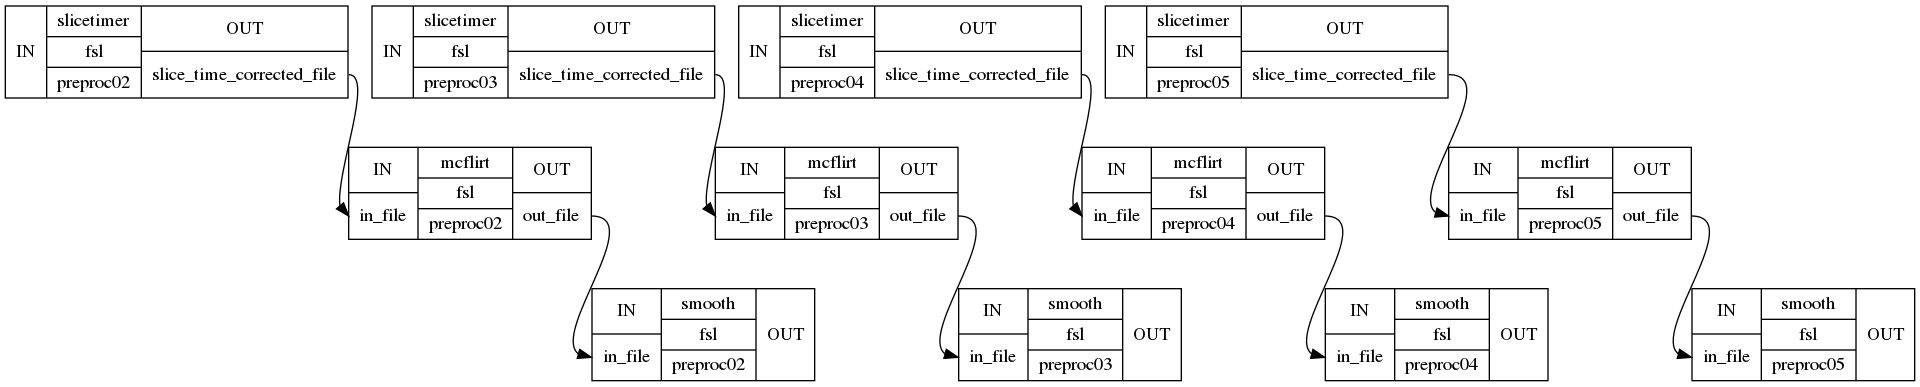

In [48]:
# Visualize graph
from IPython.display import Image
Image(filename="metaflow/graph_detailed.png")


In [49]:
# Parallel computation of preproc workflows within metaflow
%time metaflow.run('MultiProc', plugin_args={'n_procs': 5})


200324-19:54:41,547 nipype.workflow INFO:
	 Workflow metaflow settings: ['check', 'execution', 'logging', 'monitoring']
200324-19:54:41,557 nipype.workflow INFO:
	 Running in parallel.
200324-19:54:41,561 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 6.93/6.93, Free processors: 5/5.
200324-19:54:41,649 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc02.slicetimer" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc02/slicetimer".200324-19:54:41,650 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc05.slicetimer" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc05/slicetimer".200324-19:54:41,650 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc03.slicetimer" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc03/slicetimer".200324-19:54:41,650 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc04.slicetimer" in "/home/leila/test-project/data/ds000114/code/metaflow/pre

	 [Node] Setting-up "metaflow.preproc02.smooth" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc02/smooth".200324-19:56:45,781 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc03.smooth" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc03/smooth".

200324-19:56:45,783 nipype.workflow INFO:
	 [Node] Setting-up "metaflow.preproc04.smooth" in "/home/leila/test-project/data/ds000114/code/metaflow/preproc04/smooth".200324-19:56:45,791 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.utils.Smooth"), a CommandLine Interface with command:
fslmaths /home/leila/test-project/data/ds000114/code/metaflow/preproc02/mcflirt/sub-01_ses-test_task-fingerfootlips_bold_st_mcf.nii.gz -kernel gauss 0.849 -fmean sub-01_ses-test_task-fingerfootlips_bold_st_mcf_smooth.nii.gz200324-19:56:45,792 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.utils.Smooth"), a CommandLine Interface with command:
fslmaths /home/leila/test-proj

In [50]:
!tree metaflow -I '*js|*json|*pklz|_report|*.dot|*html'


metaflow
├── graph_detailed.png
├── graph.png
├── preproc02
│   ├── mcflirt
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf.nii.gz
│   ├── slicetimer
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st.nii.gz
│   └── smooth
│       ├── command.txt
│       └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf_smooth.nii.gz
├── preproc03
│   ├── mcflirt
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf.nii.gz
│   ├── slicetimer
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st.nii.gz
│   └── smooth
│       ├── command.txt
│       └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf_smooth.nii.gz
├── preproc04
│   ├── mcflirt
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st_mcf.nii.gz
│   ├── slicetimer
│   │   ├── command.txt
│   │   └── sub-01_ses-test_task-fingerfootlips_bold_st.nii.gz
│   └── smooth
│       ├── command.txt
│       

Beautiful. What have we learned?

- Use absolute pathways to define input files
- Be very careful and do not mess up the filenames
- Check filenames again, for real

## Nipype quickstart